<a href="https://colab.research.google.com/github/Mugdhaa21/Vision-Venture-SoC/blob/main/Assignment2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving Screenshot 2024-06-13 112643.png to Screenshot 2024-06-13 112643.png
Saving Screenshot 2024-06-13 112631.png to Screenshot 2024-06-13 112631.png
Saving Screenshot 2024-06-13 112608.png to Screenshot 2024-06-13 112608.png
Saving Screenshot 2024-06-13 112545.png to Screenshot 2024-06-13 112545.png
Saving Screenshot 2024-06-13 112530.png to Screenshot 2024-06-13 112530.png
Saving Screenshot 2024-06-13 112519.png to Screenshot 2024-06-13 112519.png
Saving Screenshot 2024-06-13 112502.png to Screenshot 2024-06-13 112502.png
Saving Screenshot 2024-06-13 112447.png to Screenshot 2024-06-13 112447.png
Saving Screenshot 2024-06-13 112413.png to Screenshot 2024-06-13 112413.png
Saving Screenshot 2024-06-13 112353.png to Screenshot 2024-06-13 112353.png
Saving Screenshot 2024-06-13 112329.png to Screenshot 2024-06-13 112329.png
Saving Screenshot 2024-06-13 112311.png to Screenshot 2024-06-13 112311.png
Saving Screenshot 2024-06-13 112251.png to Screenshot 2024-06-13 112251.png


This asssignment is adapted from the latest lab release of 6.1010 course of MIT.
All rights belong to the respective owners.

In this assignment, you will build a few tools for manipulating digital images, akin to those found in image-manipulation toolkits like
 Photoshop and GIMP. Interestingly, many classic image filters are implemented using the same ideas we'll develop over the
 course of this assignment.
 For this week, we will focus on greyscale images only.


**Digital Image Representation and Color Encoding:**



Before we can manipulate images, we need to understand how to represent them in Python. Although digital images can be represented in various ways, the most enduring method is a rectangular grid of pixels—tiny colored dots that collectively form the image. An image can thus be defined by its width, height, and an array of pixels, where each pixel is a color value. This method originated with early analog television and has persisted through numerous technological changes. Despite the various encoding, compression, and other techniques used by different file formats, the pixel array representation remains fundamental to most digital images.

For this assignment, we'll simplify by focusing on greyscale images. Each pixel's brightness will be encoded as a single integer in the range [0, 255] (since 1 byte can hold 256 different values), with 0 representing the deepest black and 255 representing the brightest white.

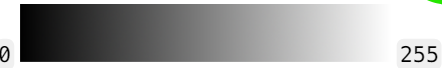

In [ ]:
from IPython.display import Image, display

# Assuming the image file name is 'example.jpg'
display(Image('Screenshot 2024-06-13 112251.png'))
import os
os.rename('Screenshot 2024-06-13 112251.png', 'example.png')

 For this assignment, we'll represent an image using a Python dictionary with three keys:

 "width": the width of the image (in pixels),

 "height": the height of the image (in pixels),

 "pixels": a Python list of pixel brightnesses stored in row-major order (listing the top row left-to-right, then the next
 row, and so on)

 For example, consider a
3x2
 image (3 rows, 2 columns)

 This image would be encoded as the following instance:

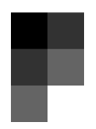

In [ ]:
from IPython.display import Image, display

# Assuming the image file name is 'example.jpg'
display(Image('Screenshot 2024-06-13 112311.png'))

In [ ]:
i = {
    "height": 3,
    "width": 2,
    "pixels": [0, 50, 50, 100, 100, 255],
}

**Loading, Saving, and Displaying Images**

We have provided two helper functions in lab.py that may be useful for debugging: load_greyscale_image and save_greyscale_image. Check the docstrings to understand their functionality.

You don't need to delve deeply into the code of these functions, but reviewing the docstrings and using the functions can help you:

Load an image.
Save it under a different filename.
After saving the image, you can use an image viewer on your computer to verify that it was saved correctly. Several example images are available in the test_images directory within the lab's code distribution, or you can use your own images for testing.

As you implement the various filters described below, these functions will help you visualize your output, aiding in debugging and allowing you to showcase your results to friends and family.

You can add code for loading, manipulating, and saving images under the if __name__ == '__main__': block in lab.py. This code will run when you execute lab.py directly but not when it is imported by the test suite. Therefore, it's a good practice to write test cases of your own design within that block rather than in the main body of the lab.py file.

**Image Filtering via Per-Pixel Transformations**

Our first task in image manipulation is to apply an inversion filter, which flips pixels around the middle grey value (0 black becomes 255 white, 1 becomes 254, and so on).

For instance, look at the following three images of an adorable cat. In each image, the left side is the original, and the right side is the inverted version. Notice how the darkest areas in the original image become the brightest in the inverted image and vice versa, while grey areas in the original result in similar (though not identical) grey areas in the inverted image.

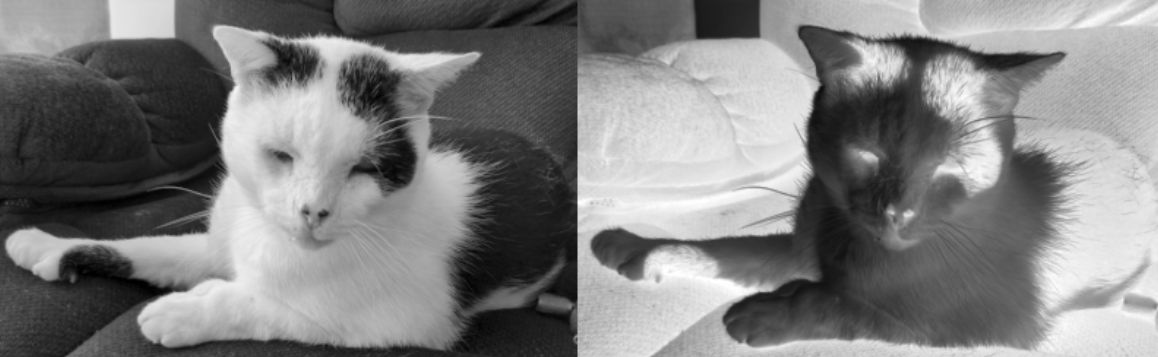

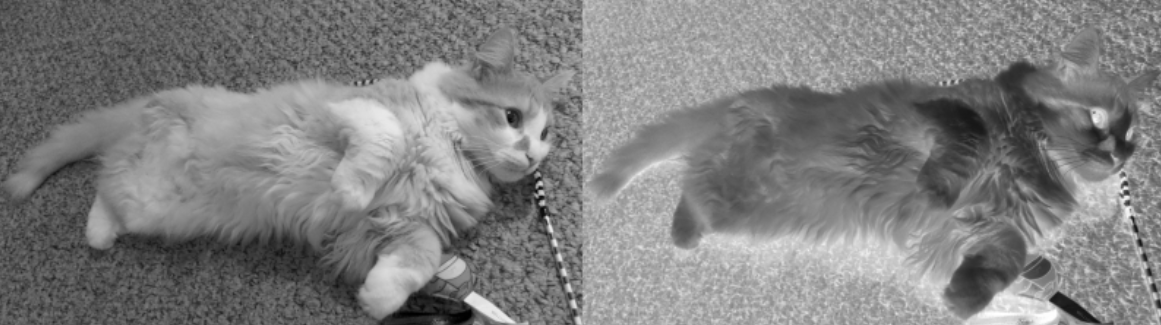

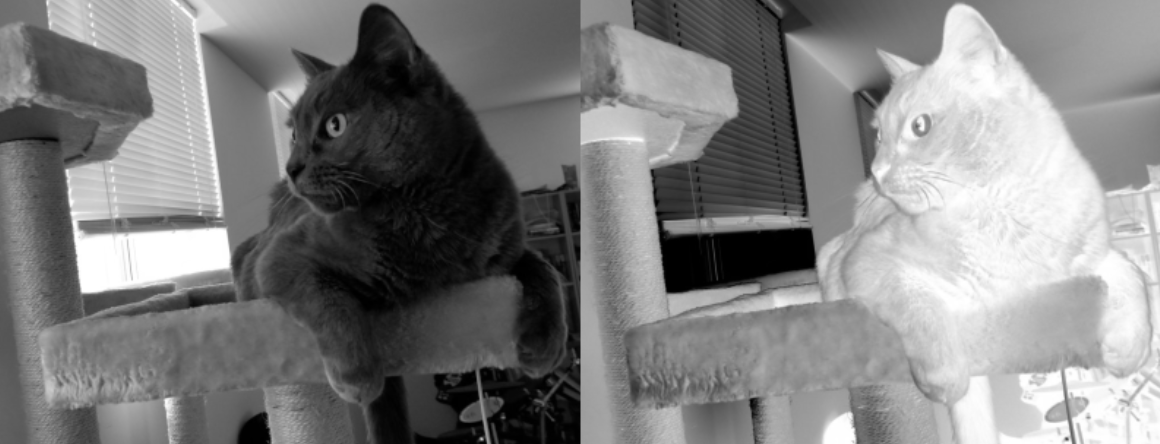

In [ ]:
from IPython.display import Image, display

# Assuming the image file name is 'example.jpg'
display(Image('Screenshot 2024-06-13 112329.png'))
display(Image('Screenshot 2024-06-13 112353.png'))
display(Image('Screenshot 2024-06-13 112413.png'))

You have been given the template of the inversion filter function (it is invoked by calling the function called
 inverted on an image). Your task in this part of the assignment is to complete the
 implementation of the inversion filter.


In [ ]:
pytest test.py -k load

This command will execute any test whose name includes "load" (such as the comprehensive test defined within the test_load function). Running this command should yield a brief report confirming the success of the single test case. By adjusting the last argument (as shown in the example), you can selectively run different subsets of tests.

To add a new test case, you can create a new function within the test.py file. It's crucial that the function name begins with "test" for it to be identified and executed as a test case.

In the provided skeleton, there's a basic test case named test_inverted_2. Modify this function to implement the test described earlier (inverting a small 1x4 image). Within this test case, define the expected result using a predefined dictionary instance and compare it against the result obtained from calling the inverted function on the original image. You can utilize our compare_images function to facilitate the comparison (refer to other test cases for guidance on its usage).

**Image Filtering via Correlation**

 Next, we'll explore some slightly more advanced image-processing techniques involving an operation called correlation.

 Given an input image I and a kernel k, applying k to I yields a new image O (perhaps with non-integer, out-of-range pixels),
 equal in height and width to I, the pixels of which are calculated according to the rules described by k.

 The process of applying a kernel k to an image I is performed as a correlation: the brightness of the pixel at position (r, c)
in the output image, which we'll denote as  O (r,c) (with O 0,0
 being the upper-left corner), is expressed as a linear combination
 of the brightnesses of the pixels around position (r, c) in the input image, where the weights are given by the kernel k.

 As an example, let's start by considering a 3x3 kernel:



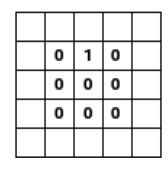

In [ ]:
from IPython.display import Image, display

# Assuming the image file name is 'example.jpg'
display(Image('Screenshot 2024-06-13 112447.png'))

When we apply this kernel to an image I, the brightness of each output pixel O (r,c) is a linear combination of the brightnesses of the 9 pixels nearest to (r,c), where each input pixel's value is multiplied by the associated value in the kernel:

In [ ]:
from IPython.display import Image, display

# Assuming the image file name is 'example.jpg'
display(Image('Screenshot 2024-06-13 112502.png'))

Consider one step of correlating an image with the following kernel

In [ ]:
 0.00  -0.07   0.00
-0.45   1.20  -0.25
 0.00  -0.12   0.00

 Here is a portion of a sample image, with the specific luminosities for some pixels given

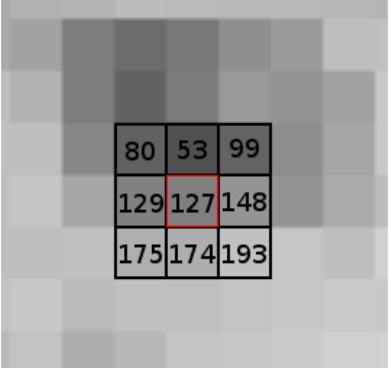

In [ ]:
from IPython.display import Image, display

# Assuming the image file name is 'example.jpg'
display(Image('Screenshot 2024-06-13 112530.png'))

What will be the value of the pixel in the output image at the location indicated by the red highlight? Enter a
 single number in the box below. Note that, although our input brightnesses were all integers in the range [0,255]
, this value will be a decimal number.

In [ ]:
#write here

When calculating the pixels on the edge of
O
O, fewer than 9 input pixels are available. For instance, consider the top-left pixel at position
(0,0)
(0,0). Here, all pixels to the top and left of
(0,0)
(0,0) are out-of-bounds. There are several approaches to handle these edge effects:

One approach is to consider every out-of-bounds pixel as having a value of 0.

Another method involves extending the input image beyond its boundaries, as described in the following paragraph.

Alternatively, wrapping the input image at its edges can also be used, which is explained in the subsequent paragraph.

 If we want to consider these out-of-bounds pixels in terms of an extended version of the input image, values to the left of
 the image should be considered to have the values from column 0, values to the top of the image should be considered to
 have the values from row 0, etc., as illustrated in the following diagram, where the bolded pixels in the center represent the
 original image, and the pixels outside that region represent the logical values in the "extended" version of the image (and
 note that this process continues infinitely in all directions, even though a finite number of pixels are shown below):

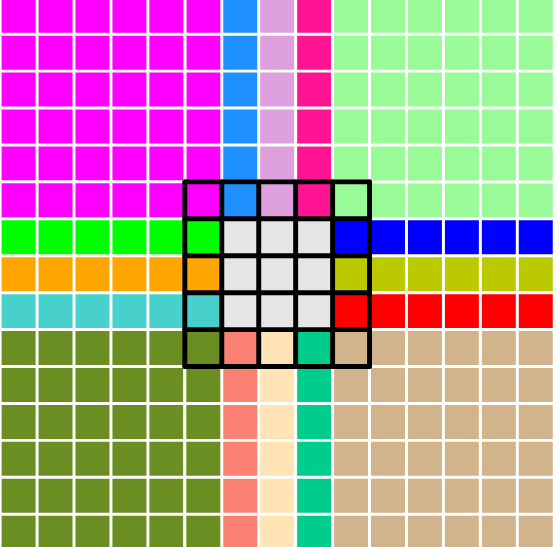

In [ ]:
from IPython.display import Image, display

# Assuming the image file name is 'example.jpg'
display(Image('Screenshot 2024-06-13 112545.png'))

 If we want to wrap the input image at its edges, that means trying to get values beyond the left edge of the image should
 return values from the right edge, but from the same row. Similarly, trying to get values beyond the top edge of the image
 should return values from the bottom edge, but from the same column. We can think of it as the image being 'tiled' in all four
 directions

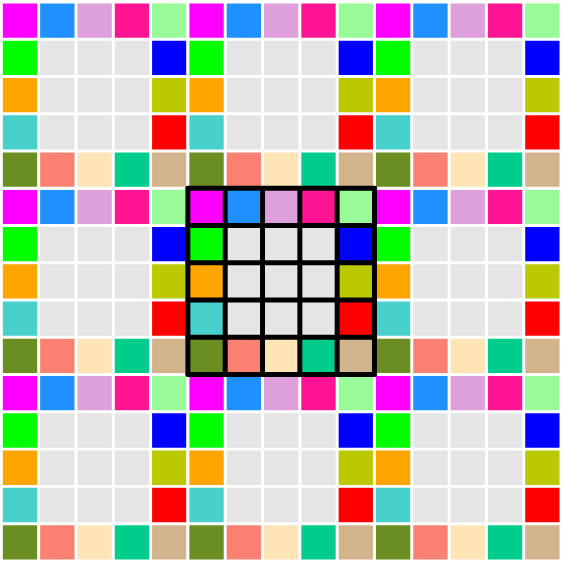

In [ ]:
display(Image('Screenshot 2024-06-13 112608.png'))

The thick black square depicted above represents the original image, while the duplicated images illustrate the wrapping behavior (though they are not part of the actual image). It's important to note that these copies only demonstrate one iteration in each direction, but ideally, wrapping should extend infinitely in all directions.

To achieve the objective of toggling between these different edge behaviors, you might consider implementing an alternative to get_pixel with an additional parameter that specifies the out-of-bounds behavior. This parameter would accept one of the strings "zero", "wrap", or "extend". The function would retrieve pixel values from within the image as usual but handle out-of-bounds pixels by returning appropriate values as discussed earlier, rather than raising an exception. By implementing this, other parts of your code can utilize this function without needing to manage whether pixels are within bounds or not.

**Correlation**

 Throughout the rest of this lab, we will be implementing several filters, each involving the computation of at least one correlation. Therefore, it's essential to establish a method to compute correlations in a general manner—applicable to any image and kernel.

It's important to note that the output of a correlation may not necessarily form a valid image (pixels might fall outside the [0, 255] range or be floating-point numbers). Since we want all our filters to produce valid images, the final step in each of our image-processing functions will involve clipping negative pixel values to 0, values greater than 255 to 255, and ensuring all values are integers.

To streamline these common operations, we recommend creating "helper" functions for each task. This approach allows our filters to simply call these functions rather than re-implementing the underlying behaviors repeatedly. Skeletons for these two helper functions, named correlate and round_and_clip_image, have been provided in lab.py. Please review the associated docstrings for these functions.

Regarding the representation of kernels used in correlation, we haven't specified a particular method. You're free to choose any representation you prefer for kernels. However, document your choice by updating the docstring of the correlate function. During the checkoff, be prepared to discuss why you chose that representation. It's assumed that all kernels will be square and have an odd number of rows and columns.

Now that we have a structured approach for our code, it's time to implement these two functions!

For effective debugging, consider writing test cases that involve correlating the 11-by-11 test_images/centered_pixel.png or another simple image with various kernels. The kernels provided in the next section can help verify that your code produces the expected results.

(You may find it beneficial to initially implement correlation for 3x3 kernels and then extend your implementation to accommodate larger kernels.)



**Example Kernels**

 Many different interesting operations can be expressed as image kernels (some examples can be seen below), and many
 scientific programs also use this pattern, so feel free to experiment

**Identity**


```
 0 0 0
 0 1 0
 0 0 0
```

 The above kernel represents an identity transformation: applying it to an image yields the input image, unchanged.

**Translation**



```
0 0 0 0 0
0 0 0 0 0
1 0 0 0 0
0 0 0 0 0
0 0 0 0 0
```
 The above kernel shifts the input image two pixels to the right, discards the rightmost two columns of pixels, and duplicates
 the leftmost column twice (when using the "extend" out-of-bounds behavior).

**Average**



```
0.0 0.2 0.0
0.2 0.2 0.2
0.0 0.2 0.0
```

 The above kernel results in an output image, each pixel of which is the average of the 5 nearest pixels of the input.

**Check Your Results**

 When you have implemented your code and are confident that it is working, try running it on  test_images/pigbird.png
with the following
13x13
 kernel (which is all zeros except for a single value):



```
 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0
 1 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0
```
 Run it once with each edge behavior (
 Result with
'zero',
 'extend', and
'wrap') and save the results as PNG images. Take a look at
 those images. Do they match your expectations? How do the different edge-effect behaviors manifest in the output?








**Blurring**

 For this part of the lab, we will implement a box blur, which can be implemented via correlation using the 'extend' behavior
 for out-of-bounds pixels4. For a box blur, the kernel is an
nxn
 square of identical values that sum to 1. Because you may
 be asked to experiment with different values of , you may wish to define a function that takes a single argument n and
 returns an n-by-n box-blur kernel.

 Notice that we have provided an outline for a function called blurred in the lab distribution. Read the docstring and the outline for blurred  to get a sense for how it should behave.

  Before implementing it, create two additional test cases by filling in the definitions of
test_blurred_black_image and
 test_blurred_centered_pixel with the following tests:

  1)Box blurs of a
6x5
 image consisting entirely of black pixels, with two different kernel sizes. The output is trivially
 identical to the input.

 2)Box blurs for the
centered_pixel.png image with two different kernel sizes. You should be able to compute the
 output manually.

  Finally, implement the box blur by filling in the body of the
blurred function.

**Check Your Results**

 When you are done and your code passes all the blur-related tests (including the ones you just created), run your blur filter
 on the
test_images/cat.png image with a box-blur kernel of size 13, save the result as a PNG image.

 Before moving on, though, let's try running this same filter with the other correlation edge effects. Generate an image using the
'zero' boundary behavior for the correlation in the blur filter, and then generate another using the 'wrap' behaviour. Look at those images; why do they look the way they do?

 Before moving on, make sure your
blurred function has been set back to using the
'extend' edge behavior,
 which is what the tests (and the other filters we'll implement in this lab) will expect.


**Sharpening**

 Next, we'll implement the opposite operation, known as a sharpen filter. The "sharpen" operation often goes by another
 name which is more suggestive of what it means: it is often called an unsharp mask because it results from subtracting an
 "unsharp" (blurred) version of the image from a scaled version of the original image.

  More specifically, if we have an image I and a blurred version of that same image B, the value of the sharpened image S
at a particular location is:

$$
S_{r,c} = 2I_{r,c} - B_{r,c}
$$

 One way we could implement this operation is by computing a blurred version of the image, and then, for each pixel,
 computing the value given by the equation above.
 While you are not required to do so, it is actually possible to perform this operation with a single correlation (with an
 appropriately chosen kernel and again using the
'extend' behavior for out-of-bounds pixels)

 Implement the unsharp mask as a function sharpened (image, n),  where
 image is an image and
n denotes the size of the
 blur kernel that should be used to generate the blurred copy of the image. You are welcome to implement this as a single
 correlation or using an explicit subtraction, though if you use an explicit subtraction, make sure that you do not do any
 rounding until the end (the intermediate blurred version should not be rounded or clipped in any way).

  Note that after computing the above, we'll still need to make sure that
sharpened ultimately returns a valid image,
 which you can do by making use of your helper function from earlier in the lab.


 Unlike the functions above, we have not provided a skeleton for this function inside of
lab.py; you will need to implement it
 yourself. And make sure to include an informative docstring for your new function!

 **Check Your Results**

 When you are done and your code passes the tests related to sharpening, run your sharpen filter on the
 test_images/python.png image with a kernel of size 11, save the result as a PNG image.



 **Edge Detection**

  Our last task for greyscale images will be to implement a really neat filter called a Sobel operator, which is useful for
 detecting edges in images.

This edge detector is a bit more complicated than the filters above because it involves two correlations5. In particular, it involves kernels K1 and K2 shown below:

K1:


```
-1 -2 -1
 0  0  0
 1  2  1
```

K2:



```
 1 0 1
-2 0 2
-1 0 1
```

 After computing
O1
 and
O2
 by correlating the input with K1 and K2 repectively,(using the 'extend' behavior for each
correlation), each pixel of the output
O

 is the square root of the sum of squares of corresponding pixels in O1 and O2:
 $$
O_{r,c} = \text{round}\left(\sqrt{O1_{r,c}^2 + O2_{r,c}^2}\right)
$$
 As always, take care to ensure that the final image is made up of integer pixels in range :
 [0,255]. But only clip the output
 after combining
O1
 and
 O2
 . If you clip the intermediate results, the combining calculation will be incorrect.

 What does each of the kernels
K1
 and
K2
 do, on its own? Try running, saving, and viewing the results of those
 intermediate correlations to get a sense of what is happening here.

  Implement the edge detector as a function
edges(image), which takes an image as input and returns a new image resulting
 from the above operations (where the edges should be emphasized).

 Also, create a new test case: edge detection on the
centered_pixel.png image. The correct result is a white ring around
 the center pixel that is 1 pixel wide.

 As with
sharpened, you should add this code to lab.py yourself. There
is no skeleton provided.

 Note also that math has been imported for you, and you are welcome to use the
sqrt function from it (though you can also
 compute square roots by raising numbers to the
 1/2
 power if you want).

 **Check Your Results**

 When you are done and your code passes the edge-detection tests (including the one you just wrote), run your edge
 detector on the
test_images/construct.png image, save the result as a PNG image


